# Magnetic Field Fitting Residuals 1D Histos
- This is an aim to better understand and quantify the models we create
- Eventually want to understand when the fit satisfies pass/fail criteria

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
#import mpl_toolkits.mplot3d as Axes3d
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [3]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from hallprobesim_redux import * # get configs

<IPython.core.display.Javascript object>

In [4]:
from hallprobecalib.hpcplots import scatter2d, scatter3d, histo, spherical_scatter3d 

In [5]:
# load data
df = DataFrameMaker(mu2e_ext_path+'datafiles/Mau13/Mu2e_DSMap_V13', input_type='pkl').data_frame

In [6]:
# reconstruct a DS fit (done two weeks ago)
cfg_pickle_recreate = cfg_pickle(use_pickle=True, save_pickle=False,
                                 load_name='Mau13', save_name='Mau13', recreate=True)
'''
cfg_params  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                         pitch2=0, ms_h2=0, ns_h2=0,
                         length1=9.2, ms_c1=5, ns_c1=3,
                         length2=0, ms_c2=0, ns_c2=0,
                         ks_dict={'k3':768},
                         bs_tuples=((0.25, 0, -4.6),
                                    (0.25, 0, 4.6)),
                         bs_bounds=(1e-3, 1e-3, 4),
                         version=1000)
'''
hmd, ff = field_map_analysis('fma_mau13', cfg_data_DS_Mau13,
                                  cfg_geom_cyl_800mm_long, cfg_params_DS_Mau13,
                                  cfg_pickle_recreate, cfg_plot_none)

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=10, ms_c1=50, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=None, bs_bounds=None, version=1000)
Elapsed time was 1.74559 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 0
    # data points      = 46560
    # variables        = 0
    chi-square         = 3136363.28
    reduced chi-square = 67.3617543
    Akaike info crit   = 196021.204
    Bayesian info crit = 196021.204
[[Variables]]
    pitch1:    13 (fixed)
    ms_h1:     50 (fixed)
    ns_h1:     4 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:   8175.79 (fixed)
    Dh1_0_0:   10912.5 (fixed)
    Ah1_0_1:   0 (fixed

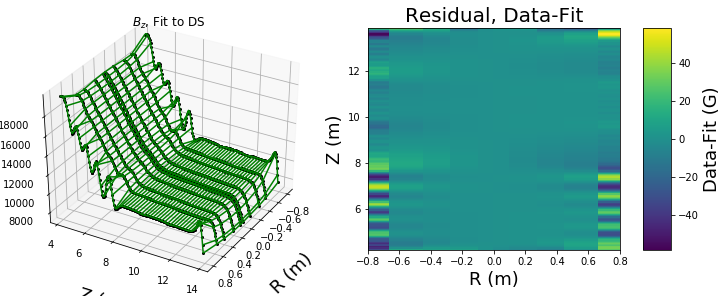

In [7]:
# quick plot
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.85 and Phi=={phi} and 4.2<Z<13.9',
            title_simp = r'$B_{z}$, Fit to DS', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bz_C_fit.png', bbox_inches='tight')

In [8]:
bz_res = ff.input_data.Bz - ff.input_data.Bz_fit

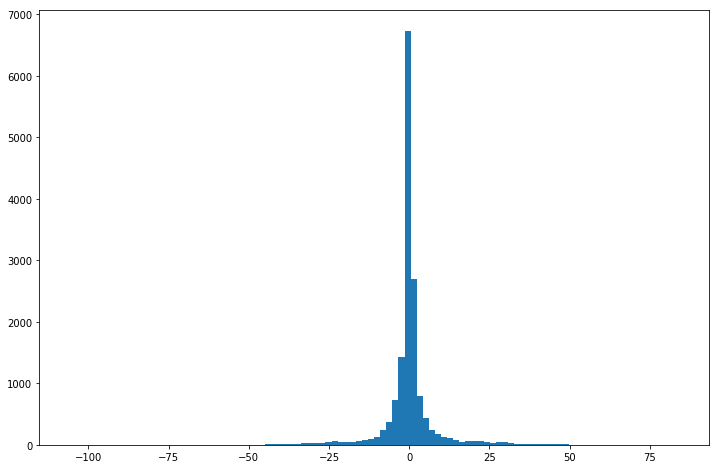

In [17]:
plt.hist(bz_res,bins=100);

In [10]:
bz_res.describe()

count    15520.000000
mean        -0.000169
std          8.477861
min       -105.816433
25%         -1.217614
50%         -0.009781
75%          1.010400
max         83.935554
dtype: float64

In [11]:
# now try selecting only the tracker region
df_fit = ff.input_data
tracker = (df_fit.Z < 11.66) & (df_fit.Z > 8.41)
#bz_res_track = df_fit[tracker].Bz - df_fit[tracker].Bz_fit

In [12]:
#bz_res_track.describe()
bz_res[tracker].describe()

count    5200.000000
mean       -0.007120
std         3.031248
min       -19.342901
25%        -0.772378
50%         0.009260
75%         0.743199
max        23.677763
dtype: float64

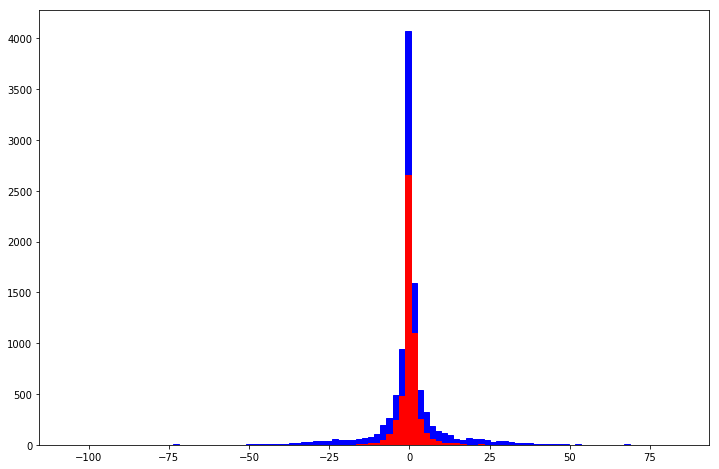

In [18]:
bins = np.histogram_bin_edges(bz_res,bins=100)
plt.hist(bz_res[~tracker],fill=True,color='blue',edgecolor='blue',stacked=True,bins=bins)
plt.hist(bz_res[tracker],fill=True, color='red',edgecolor='red',stacked=True,bins=bins);

In [14]:
# full dataset
#results_full = ff.result.eval(x=df)

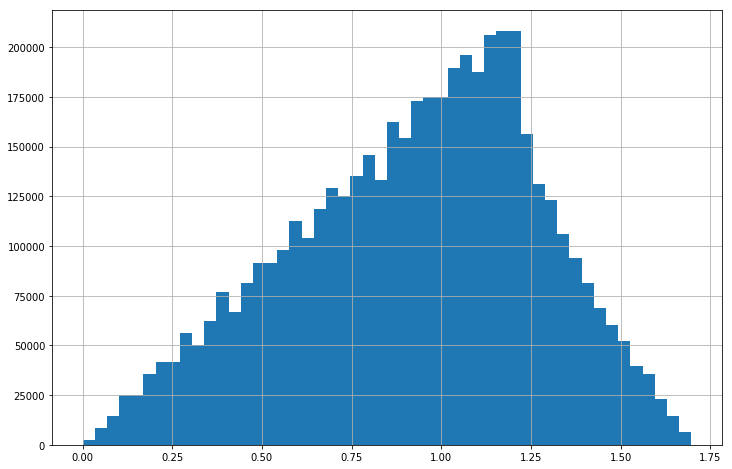

In [19]:
df.R.hist(bins=50)

In [23]:
histo(df_fit.R, bins=50, inline=True)

In [105]:
x = np.linspace(-5.,5.,101)
y = np.linspace(-5.,5.,101)
z = np.linspace(-5.,5.,101)

XX, YY, ZZ = np.meshgrid(x,y,z)
XX = XX.flatten()
YY = YY.flatten()
ZZ = ZZ.flatten()

In [113]:
grid = pd.DataFrame()

In [115]:
grid['X'] = pd.Series(XX)
grid['Y'] = pd.Series(YY)
grid['Z'] = pd.Series(ZZ)

In [119]:
grid['R'] = (grid.X**2 + grid.Y**2 + grid.Z**2)**(1/2)

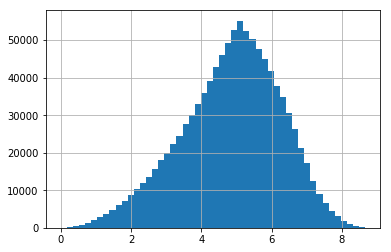

In [123]:
grid.R.hist(bins=50)